In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Experiment-1:

**- Create low pass filter and apply it to the image.**

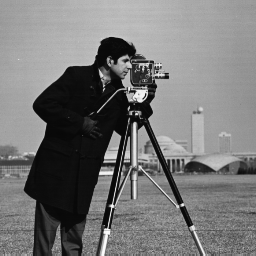

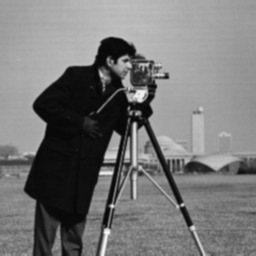

In [24]:
# Read the image
cameraMan = cv2.imread('/content/cameraman.jpg')

# Apply the Gaussian filter with a kernel size of 3x3 and sigma value of 0
blur = cv2.GaussianBlur(cameraMan, (3, 3), 0)

# Display the original and filtered image
cv2_imshow(cameraMan)
cv2_imshow(blur)


**- Create high pass filter and apply it to the image.**

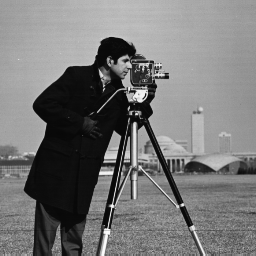

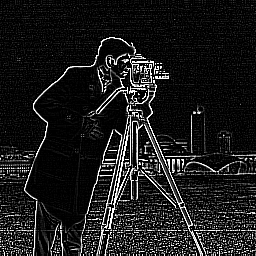

In [25]:

# Convert the image to grayscale
gray = cv2.cvtColor(cameraMan, cv2.COLOR_BGR2GRAY)

# Apply the Laplacian filter with a kernel size of 3x3
laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)


# Display the original and filtered image
cv2_imshow(cameraMan)
cv2_imshow(laplacian)

# Experiment-2:

In [29]:
# Read the image
eight = cv2.imread('eight.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(eight , cv2.COLOR_BGR2GRAY)


**- Apply gaussian noise on the given image**

In [30]:

# Apply Gaussian noise to the image
noise = np.random.normal(0, 20, gray_img.shape)
noisy_img = np.clip(gray_img + noise, 0, 255).astype(np.uint8)

# Convert the noisy image to grayscale
noisy_gray = cv2.cvtColor(noisy_img, cv2.COLOR_GRAY2BGR)


**- Apply adaptive wiener filter**

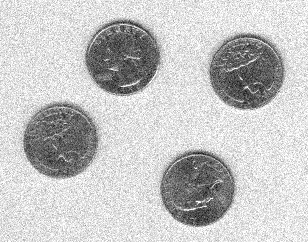

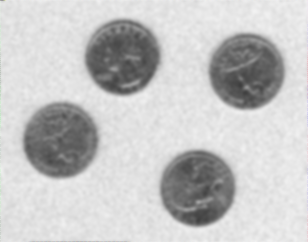

In [37]:
# Apply Adaptive Wiener filter to the noisy image
filtered_img = cv2.ximgproc.anisotropicDiffusion(
    noisy_gray, #img
    alpha=0.1,  #Conduction coefficient
    K=10,       #diffusivity factor
    niters=4    #number of iterations of the diffusion process
)

# Display the noisy and filtered images side by side
cv2_imshow( noisy_img)
cv2_imshow( filtered_img)

#Experiment-3:

**- Apply salt and pepper noise**

<ipython-input-46-456d1ae50444>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noise_img = noise_img.astype(np.float) + noise.astype(np.float) * 255 * 0.15


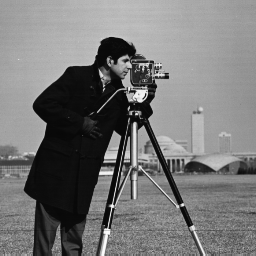

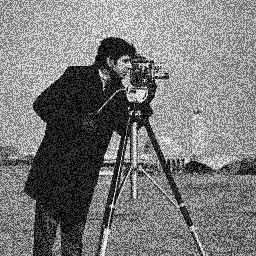

In [46]:
# Add salt and pepper noise
noise_img = np.copy(cameraMan)
noise = np.random.randint(0, 2, size=noise_img.shape[:2])
noise[noise == 0] = -1
noise = noise[:, :, np.newaxis]
noise_img = noise_img.astype(np.float) + noise.astype(np.float) * 255 * 0.15
noise_img = np.clip(noise_img, 0, 255).astype(np.uint8)
cv2_imshow( cameraMan)
cv2_imshow( noise_img)

**-Apply arithmetic mean filter**

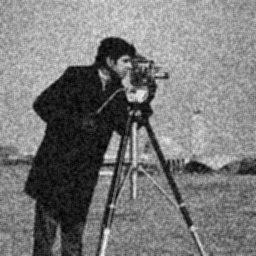

In [47]:
mean_img = cv2.blur(noise_img, (3, 3))
cv2_imshow( mean_img)

**- Apply median filter**

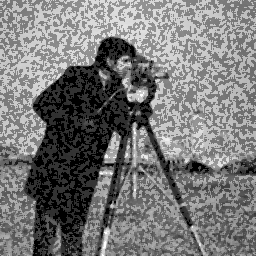

In [48]:
median_img = cv2.medianBlur(noise_img, 3)
cv2_imshow( median_img)

**- Apply max filter**

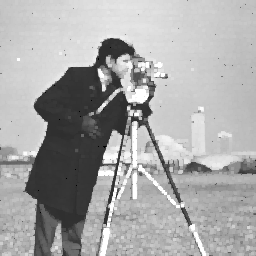

In [49]:
max_img = cv2.dilate(noise_img, np.ones((3, 3), np.uint8))
cv2_imshow( max_img)

**- Apply min filter**



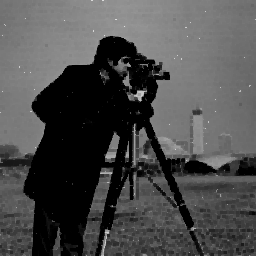

In [50]:
min_img = cv2.erode(noise_img, np.ones((3, 3), np.uint8))
cv2_imshow( min_img )